# Пакет `pandas`: визуализация данных

---

**Источники:**

[Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[Визуализируйте данные машинного обучения в Python с помощью Pandas](https://www.machinelearningmastery.ru/visualize-machine-learning-data-python-pandas/)

[Как визуализировать данные: типы графиков](https://netology.ru/blog/typy-grafikov)

[Data Visualization: How to Choose the Right Chart and Graph for Your Data](https://365datascience.com/trending/chart-types-and-how-to-select-the-right-one/)

[The Indispensable Guide to Chart Design and Data Visualization—Part 1](https://www.zapbi.com/blogs/chart_design_data_visualization_part_1/)
    
---

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [5]:
# !conda install pandas matplotlib numpy -y

In [3]:
import pandas as pd

pd.__version__

'1.2.2'

## Загрузка данных

Для примера возьмем [данные (data set) Gapminder World](https://www.kaggle.com/tklimonova/gapminder-datacamp-2007).

In [15]:
df = pd.read_csv('./../../data/gapminder_full.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


In [46]:
df_mean_by_continent = df.groupby(by=["continent"]).mean().sort_values(by='life_exp', 
                                                                       ascending=False)
df_mean_by_continent

,year,population,life_exp,gdp_cap
continent,,,,
Oceania,1979.50,8874672.33,74.33,18621.61
Europe,1979.50,17169764.73,71.90,14469.48
Americas,1979.50,24504795.00,64.66,7136.11
Asia,1979.50,77038721.97,60.06,7902.15
Africa,1979.50,9916003.14,48.87,2193.75


In [56]:
# сумма населения по году и континенту
pvt = df.pivot_table(index='year', 
                     columns='continent',
                     aggfunc={'life_exp': "mean", 
                              'gdp_cap': "mean",
                              'population': "sum"})
pvt

gdp_cap                                     life_exp                 \
continent  Africa Americas     Asia   Europe  Oceania   Africa Americas  Asia   
year                                                                            
1952      1252.57  4079.06  5195.48  5661.06 10298.09    39.14    53.28 46.31   
1957      1385.24  4616.04  5787.73  6963.01 11598.52    41.27    55.96 49.32   
1962      1598.08  4901.54  5729.37  8365.49 12696.45    43.32    58.40 51.56   
1967      2050.36  5668.25  5971.17 10143.82 14495.02    45.33    60.41 54.66   
1972      2339.62  6491.33  8187.47 12479.58 16417.33    47.45    62.39 57.32   
1977      2585.94  7352.01  7791.31 14283.98 17283.96    49.58    64.39 59.61   
1982      2481.59  7506.74  7434.14 15617.90 18554.71    51.59    66.23 62.62   
1987      2282.67  7793.40  7608.23 17214.31 20448.04    53.34    68.09 64.85   
1992      2281.81  8044.93  8639.69 17061.57 20894.05    53.63    69.57 66.54   
1997      2378.76  8889.30  9834.09 19076.78 24024.18    53.60    71.15 68.02   
2002      2599.39  9287.68 10174.09 21711.73 26938.78    53.33    72.42 69.23   
2007      3089.03 11003.03 12473.03 25054.48 29810.19    54.81    73.61 70.73   

                         population                                    \
continent Europe Oceania     Africa   Americas        Asia     Europe   
year                                                                    
1952       64.41   69.25  237640501  345152446  1395357351  418120846   
1957       66.70   70.30  264837738  386953916  1562780599  437890351   
1962       68.54   71.09  296516865  433270254  1696357182  460355155   
1967       69.74   71.31  335289489  480746623  1905662900  481178958   
1972       70.78   71.91  379879541  529384210  2150972248  500635059   
1977       71.94   72.85  433061021  578067699  2384513556  517164531   
1982       72.81   74.29  499348587  630290920  2610135582  531266901   
1987       73.64   75.32  574834110  682753971  2871220762  543094160   
1992       74.44   76.94  659081517  739274104  3133292191  558142797   
1997       75.51   78.19  743832984  796900410  3383285500  568944148   
2002       76.70   79.74  833723916  849772762  3601802203  578223869   
2007       77.65   80.72  929539692  898871184  3811953827  586098529   

                     
continent   Oceania  
year                 
1952       10686006  
1957       11941976  
1962       13283518  
1967       14600414  
1972       16106100  
1977       17239000  
1982       18394850  
1987       19574415  
1992       20919651  
1997       22241430  
2002       23454829  
2007       24549947

In [34]:
df_population_sum_by_year = df.groupby(by=["year"]).population.sum().sort_values(ascending=False)
df_population_sum_by_year

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: population, dtype: int64

## Обзор возможностей пакета `pandas` для рисования графиков (метод `pandas.DataFrame.plot`)

Пакет `pandas` позволяет рисовать графики по `Series` и `DataFrame`.

Метод [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) использует бэкэнд, указанный опцией `plotting.backend`. По умолчанию используется **`matplotlib`**.

Доступные типа графиков:
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : тоже самое, что и 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

### Графики (line plot)


<AxesSubplot:xlabel='year'>

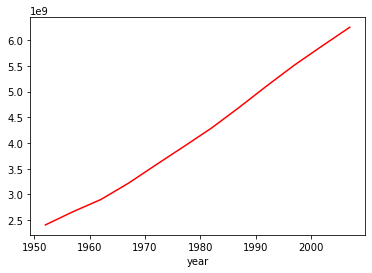

In [40]:
df_population_sum_by_year.plot.line(color='red')

<AxesSubplot:>

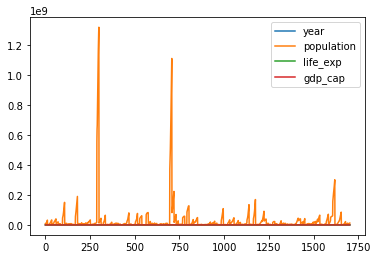

In [41]:
df..plot(kind='line')

### Столбчатые диаграммы - вертикальные (vertical bar plot)

### Столбчатые диаграммы - горизонтальные (horizontal bar plot)

## Гистограмма (Histogram)

**Гистограммы** группируют данные в ячейки и подсчитывают количество наблюдений в каждой ячейке. По форме ячеек вы можете быстро определить, является ли атрибут гауссовским, перекошенным или даже имеет экспоненциальное распределение. Это также может помочь вам увидеть возможные выбросы.

### Ящик с усами (Boxplot)

## График плотности (Kernel Density Estimation = KDE plot | density)

**Графики плотности** - еще один способ получить представление о распределении каждого атрибута.

Графики выглядят как абстрагированная гистограмма с плавной кривой, проходящей через верхнюю часть каждого бина.

###  (area plot)

### Круговые диаграммы (pie plot)

### Диаграмма рассеяния (scatter plot)

### (hexbin plot)